# Analytical and Symbolic Computations 

This notebook should be run in the Python kernel as parts employs sympy. 

## Import Package 

## Section 1: Initial Value Problem: Mass - Spring System 

In [15]:
# model without damping 
import sympy as sym
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, pi
from sympy.abc import t
u = Function('u')

m, k = symbols("m k", positive=True)
eq = m*u(t).diff(t,t) + k*u(t)
ics={u(0): 1, u(t).diff(t).subs(t, 0): 0} 
sol = dsolve(eq,simplify=True,complex=True)
plot(sol.rhs.subs(k,1).subs(m,1),(t,0,1)) 

ValueError: Incompatible free symbols of the expressions with the ranges.
Free symbols in the expressions: {u(t)}
Free symbols in the ranges: {t}

## Section 2: Boundary Value Problem: Closed Form Analytical Reference Solution

Lambda(x, -x*(x - 1))
Eq(u(x), x**4/12 - x**3/6 + x/12)


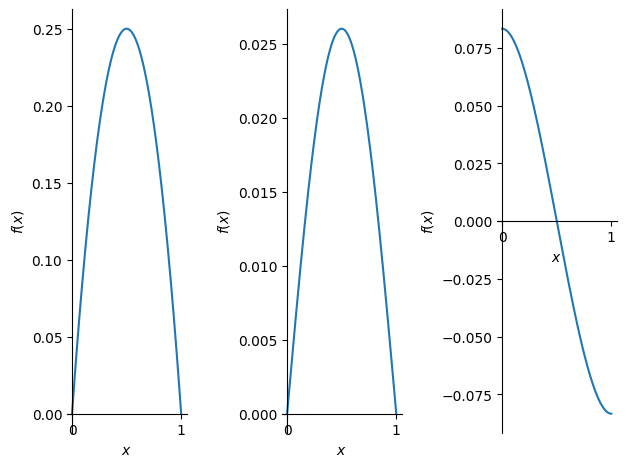

In [1]:
from sympy import Function, dsolve, Derivative, Eq, sin, cos, symbols, pi, Lambda, Heaviside
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

u, src = symbols("u src", cls=Function)
x      = symbols("x")
src    = Lambda(x, -x*(x-1))

# Solve the ODE ()
eqn  = Eq(Derivative(u(x), x, x) + src(x),0)
ics0 = {u(0): 0, u(1): 0}

sol = dsolve(eqn,ics = ics0)

print(src)
print(sol)  

plotsrc = plot(src, (x, 0, 1), show=False)
plotu   = plot(sol.rhs, (x, 0, 1), show=False)
plotdu  = plot(Derivative(sol.rhs,x,evaluate=True), (x, 0, 1), show=False)
PlotGrid(1,3,plotsrc, plotu, plotdu)

In [2]:
Derivative(sol.rhs,x,evaluate=True)

x**3/3 - x**2/2 + 1/12

## Section 3: Boundary Value Problem: Localized Force  

Lambda(x, -Heaviside(x - 0.55) + Heaviside(x - 0.45))
Eq(u(x), x**2*(Heaviside(x - 0.55) - Heaviside(x - 0.45))/2 + x*(-Piecewise((0, 1.81818181818182*Abs(x) < 1), (x*meijerg(((0, 1), ()), ((), (-1, 0)), 1.81818181818182*x), True)) + Piecewise((0, 2.22222222222222*Abs(x) < 1), (x*meijerg(((0, 1), ()), ((), (-1, 0)), 2.22222222222222*x), True)) - 0.05) - 0.15125*Heaviside(x - 0.55) + 0.10125*Heaviside(x - 0.45))


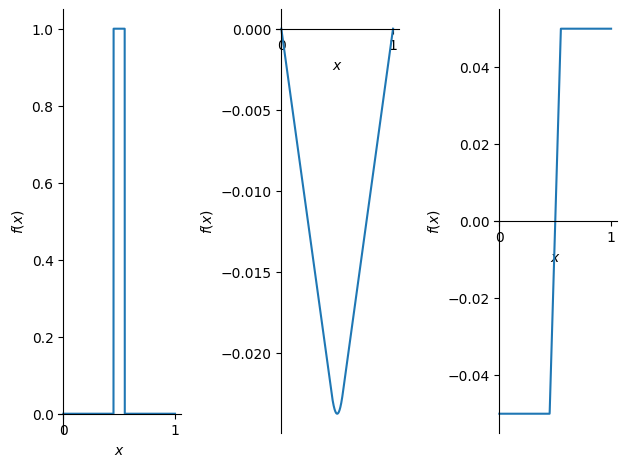

In [9]:
from sympy import Function, dsolve, Derivative, Eq, sin, cos, symbols, pi, Lambda, Heaviside
from sympy.plotting import plot, PlotGrid
from sympy.abc import x

u, src = symbols("u src", cls=Function)
x      = symbols("x")
src    = Lambda(x, -(Heaviside(x-0.55) - Heaviside(x-0.45)))

# Solve the ODE ()
eqn  = Eq(Derivative(u(x), x, x) - src(x),0)
ics0 = {u(0): 0, u(1): 0}

sol = dsolve(eqn,ics = ics0)

print(src)
print(sol)  

plotsrc = plot(src, (x, 0, 1), show=False)
plotu   = plot(sol.rhs, (x, 0, 1), show=False)
plotdu  = plot(Derivative(sol.rhs,x,evaluate=True), (x, 0, 1), show=False)
PlotGrid(1,3,plotsrc, plotu, plotdu)